In [1]:
import SimpleITK as sitk
import os
import sys
import glob
import re
import matplotlib.pyplot as plt
import time

In [2]:
XY_TILES = sorted(glob.glob('./LOC*'))
CORRECTED_TILES_DIR = './s3617_n4_corrected_tiles/'
LOG_FILE = './n4_log'

# Running N4ITK

In [ ]:
for loc in XY_TILES:
    loc_name = loc.replace('./', '')
    print("\nOn location {}".format(loc_name))
    loc_start_time = time.time()
    with open(LOG_FILE, 'a') as log:
        log.write("On location {}\n".format(loc_name))
    corrected_loc_dir = CORRECTED_TILES_DIR+loc_name+'/'
    if not os.path.isdir(corrected_loc_dir):
        os.makedirs(corrected_loc_dir)
    tifs = sorted(glob.glob(loc+'/*.tif'))
    
    for i,tif in enumerate(tifs):
        tif_start_time = time.time()
        m = re.search('([\w]+).tif', tif)
        tif_name = m.group(1)
        orig_img = sitk.ReadImage(tif)
        # Downsample
        img = sitk.Shrink(orig_img, [4,4])
        # Casting for compliance with N4
        img_data=sitk.Cast(img,sitk.sitkFloat32)
        
        # Image mask
        img_mask=sitk.BinaryNot(sitk.OtsuThreshold(img_data))
        corrected_img = sitk.N4BiasFieldCorrection(img_data, img_mask)
        
        sitk.WriteImage(corrected_img, corrected_loc_dir+tif_name+'.tif')
        tif_end_time = time.time()
        sys.stdout.write("Done with image {} in {} seconds\r".format(tif_name, tif_end_time-tif_start_time))
        with open(LOG_FILE, 'a') as log:
            log.write("Done with image {} in {} seconds\n".format(tif_name, tif_end_time-tif_start_time))
    loc_finish_time = time.time()
    with open(LOG_FILE, 'a') as log:
        log.write("Finished {} in {} seconds\n".format(loc_name, loc_finish_time - loc_start_time))
print("\nDone")


On location LOC005



On location LOC005
img size (2048, 2048)
resampled size (1024, 1024)


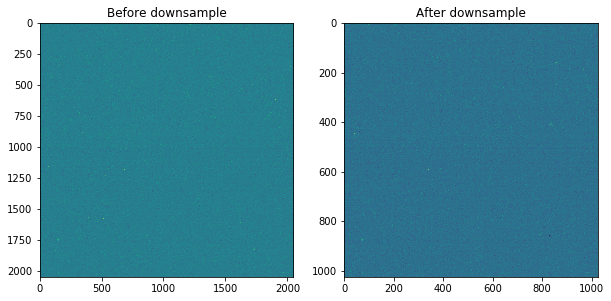

img size (2048, 2048)005D_CM0_CHN01_PLN0000
resampled size (1024, 1024)


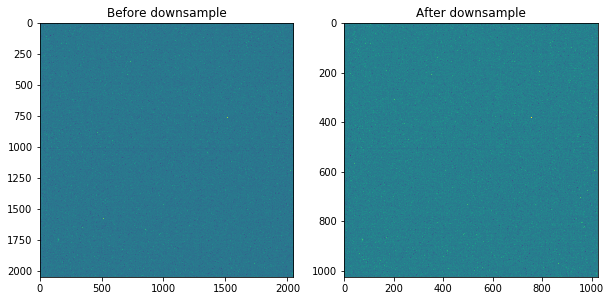

img size (2048, 2048)005D_CM0_CHN01_PLN0001
resampled size (1024, 1024)


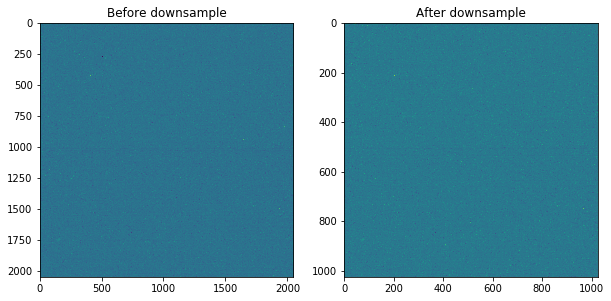

img size (2048, 2048)005D_CM0_CHN01_PLN0002
resampled size (1024, 1024)


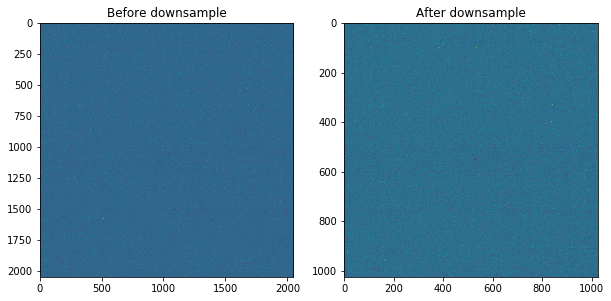

img size (2048, 2048)005D_CM0_CHN01_PLN0003
resampled size (1024, 1024)


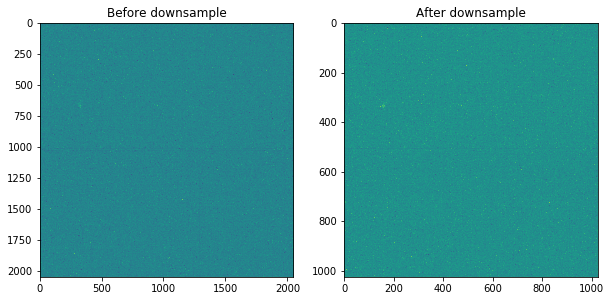

img size (2048, 2048)005D_CM0_CHN01_PLN0004
resampled size (1024, 1024)


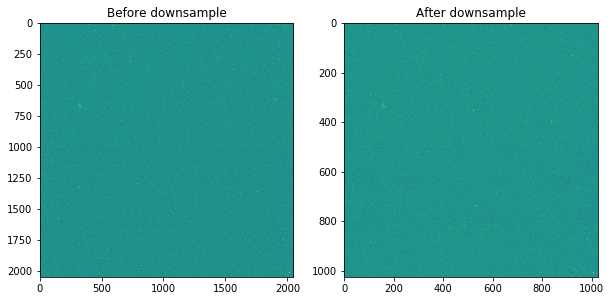

img size (2048, 2048)005D_CM0_CHN01_PLN0005
resampled size (1024, 1024)


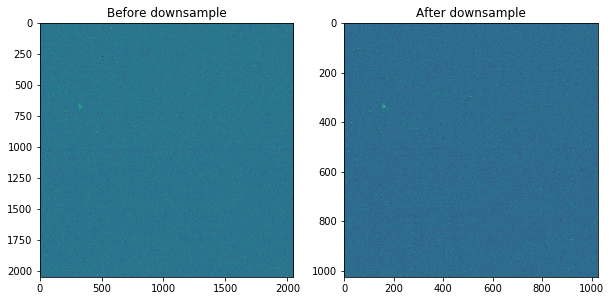

img size (2048, 2048)005D_CM0_CHN01_PLN0006
resampled size (1024, 1024)


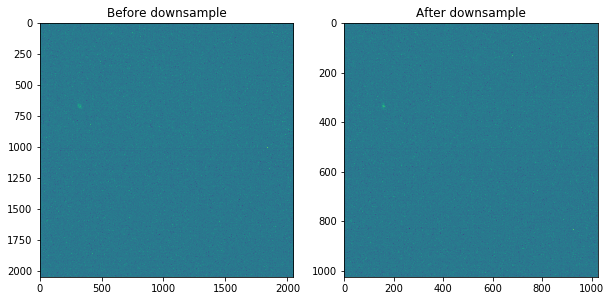

img size (2048, 2048)005D_CM0_CHN01_PLN0007
resampled size (1024, 1024)


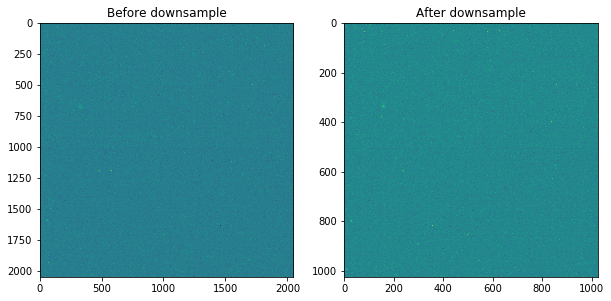

img size (2048, 2048)005D_CM0_CHN01_PLN0008
resampled size (1024, 1024)


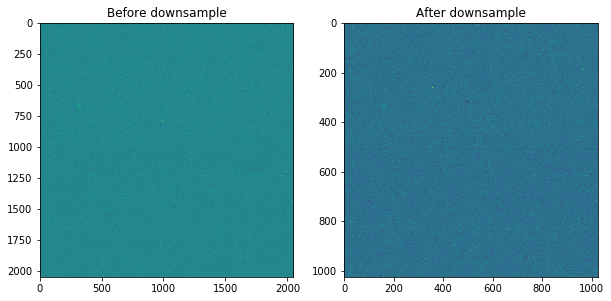

img size (2048, 2048)005D_CM0_CHN01_PLN0009
resampled size (1024, 1024)


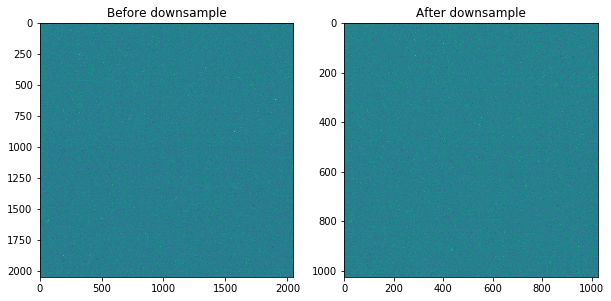

img size (2048, 2048)005D_CM0_CHN01_PLN0010
resampled size (1024, 1024)


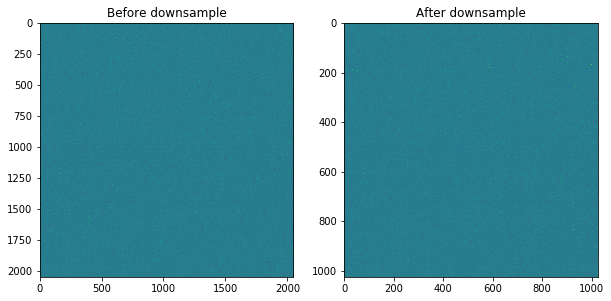

img size (2048, 2048)005D_CM0_CHN01_PLN0011
resampled size (1024, 1024)


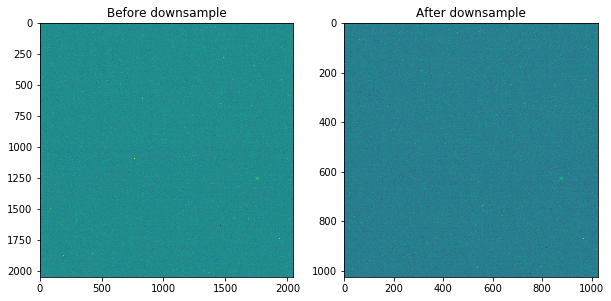

img size (2048, 2048)005D_CM0_CHN01_PLN0012
resampled size (1024, 1024)


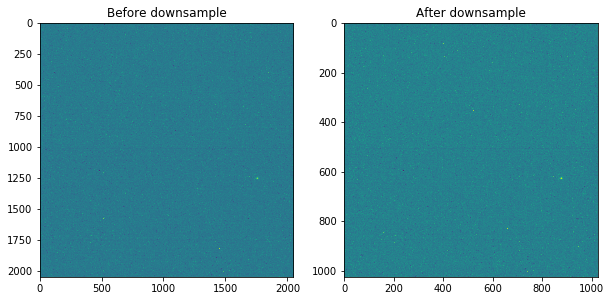

img size (2048, 2048)005D_CM0_CHN01_PLN0013
resampled size (1024, 1024)


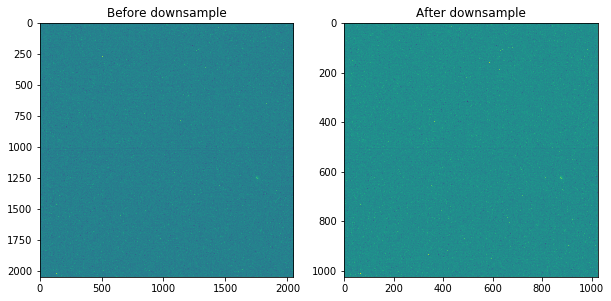

img size (2048, 2048)005D_CM0_CHN01_PLN0014
resampled size (1024, 1024)


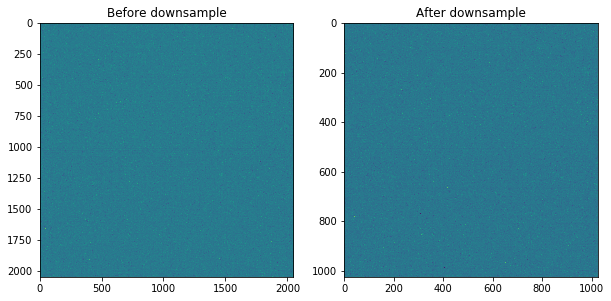

img size (2048, 2048)005D_CM0_CHN01_PLN0015
resampled size (1024, 1024)


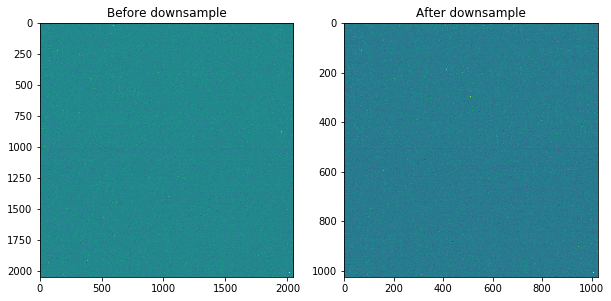

img size (2048, 2048)005D_CM0_CHN01_PLN0016
resampled size (1024, 1024)


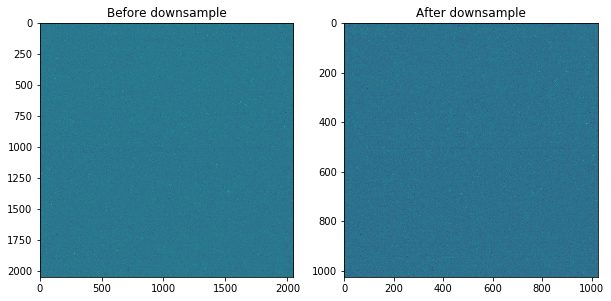

img size (2048, 2048)005D_CM0_CHN01_PLN0017
resampled size (1024, 1024)


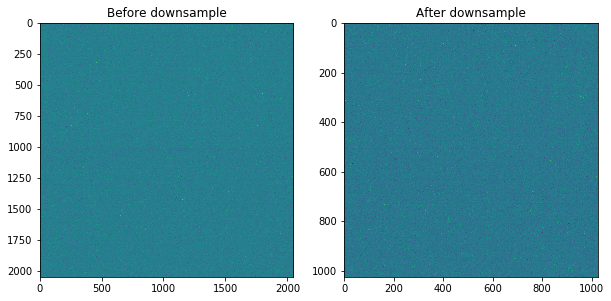

img size (2048, 2048)005D_CM0_CHN01_PLN0018
resampled size (1024, 1024)


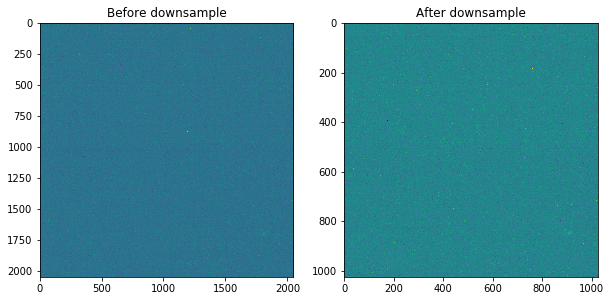

img size (2048, 2048)005D_CM0_CHN01_PLN0019
resampled size (1024, 1024)


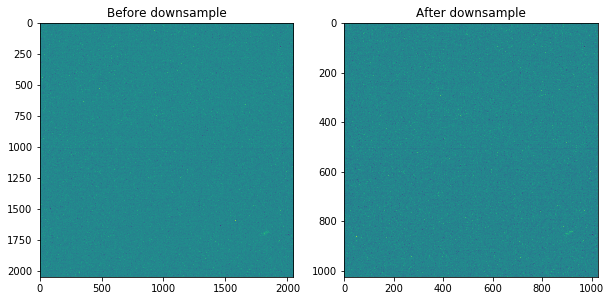

img size (2048, 2048)005D_CM0_CHN01_PLN0020
resampled size (1024, 1024)


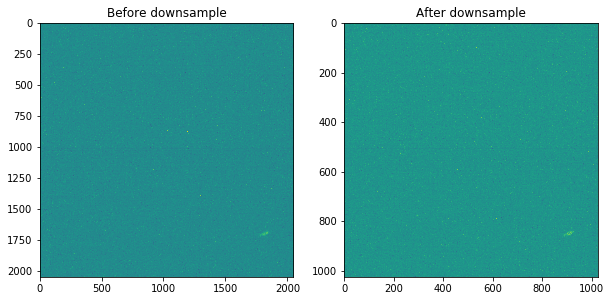

img size (2048, 2048)005D_CM0_CHN01_PLN0021
resampled size (1024, 1024)


In [ ]:
#         plt.figure(figsize=(10,20))
#         plt.subplot(121)
#         plt.title('Before downsample')
#         plt.imshow(sitk.GetArrayFromImage(orig_img))
        
#         plt.subplot(122)
#         plt.title('After downsample')
#         plt.imshow(sitk.GetArrayFromImage(img))
#         plt.show()
# Plot the images
#         plt.figure(figsize=(8,10))
        
#         plt.subplot(321+i*2)
#         plt.title('Before correction')
#         plt.imshow(sitk.GetArrayFromImage(img_data))
        
#         plt.subplot(30+2+i+IMAGES*100)
#         plt.title('After correction with binary threshold')
#         plt.imshow(sitk.GetArrayFromImage(corrected_bin_img))
        
#         plt.subplot(322+i*2)
#         plt.title('After correction')
#         plt.imshow(sitk.GetArrayFromImage(corrected_img))

        

# Plotting

./LOC078/VW0_LOC078D_CM0_CHN01_PLN1275.tif
./s3617_n4_corrected_tiles/LOC078/VW0_LOC078D_CM0_CHN01_PLN1275.tif
./LOC078/VW0_LOC078D_CM0_CHN01_PLN0576.tif
./s3617_n4_corrected_tiles/LOC078/VW0_LOC078D_CM0_CHN01_PLN0576.tif
./LOC078/VW0_LOC078D_CM0_CHN01_PLN1370.tif
./s3617_n4_corrected_tiles/LOC078/VW0_LOC078D_CM0_CHN01_PLN1370.tif
./LOC078/VW0_LOC078D_CM0_CHN01_PLN1216.tif
./s3617_n4_corrected_tiles/LOC078/VW0_LOC078D_CM0_CHN01_PLN1216.tif


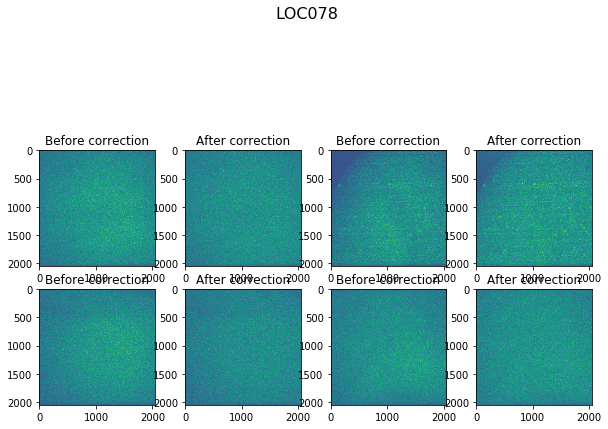

In [7]:
GRID_LEN = 8
GRID_WID = 4

for j,loc in enumerate(XY_TILES):
    loc_name = loc.replace('./', '')
    corrected_loc_dir = CORRECTED_TILES_DIR+loc_name+'/'
    tifs = glob.glob(loc+'/*.tif')
    plt.figure(j,figsize=(10,20))
    plt.suptitle('{}'.format(loc_name), fontsize=16)
    for i,tif in enumerate(tifs):
        sys.stdout.write("Current image {}\r".format(i+1))
        m = re.search('([\w]+).tif', tif)
        tif_name = m.group(1)
        
        orig_img = sitk.ReadImage(tif)
        plt.subplot(841+i*2)
        plt.title('Before correction')
        plt.imshow(sitk.GetArrayFromImage(orig_img))
        print(tif)
        print(corrected_loc_dir+tif_name+'.tif')
        corrected_img = sitk.ReadImage(corrected_loc_dir+tif_name+'.tif')
        plt.subplot(842+i*2)
        plt.title('After correction')
        plt.imshow(sitk.GetArrayFromImage(corrected_img))
        
        if i == 3:
            break
    break
    if j == 7:
        break
plt.show()

In [ ]:
VW0_LOC165D_CM0_CHN01_PLN1398.tif